## Bound a topic by a 1D or 2D Manifold Projection

Here's the main idea:

1) A sentence embedding gives you a map or function between the set of tokens (including position) into a fixed point in semantic space.
2) The distances in the semantic space can be non linear so we use a manifold projection tool like u-map to project the embedding points down to 1D or 2D.
3) If you have a set of examples of different topics they map to different areas in 1D or 2D.
4) Fit a projection on a whole host of conversations and topics, check that there is a good separation of the topics in the lower dimension.
5) You can use a convex-hull in 2d, a simple bin, or even a probability test to determine if a new sentence falls within a topic or not.
6) You can quickly check if the input or output to an LLM is a space, if not guide it to get back on topic

In [36]:
from datasets import load_dataset
import pandas as pd

wiki_topics = load_dataset("tarekziade/wikipedia-topics")

df = wiki_topics['test'].to_pandas().iloc[:100]

In [38]:
from semantic_router.encoders import FastEmbedEncoder

encoder = FastEmbedEncoder(name="BAAI/bge-small-en-v1.5")

In [39]:
embedding_list = encoder(df['text'].to_list())

In [40]:
len(embedding_list)

100

In [41]:
import umap
reducer = umap.UMAP(n_components=1)

In [42]:
embedding = reducer.fit_transform(embedding_list)

In [60]:
df = df.assign(E=[float(_emb[0].astype(float)) for _emb in embedding])

In [68]:
df['categories'] = df['categories'].astype(str)

In [72]:
df['categories'].unique()

array(["['Ethics']", "['Mass_media']", "['Entities']",
       "['Food_and_drink']", "['Technology']", "['Education']",
       "['Health']", "['Energy']", "['Government']", "['Knowledge']",
       "['Information']", "['Humanities']", "['Religion']", "['Nature']",
       "['Philosophy']", "['Economy']", "['Time']", "['Human_behavior']",
       "['Engineering']", "['Military']", "['Law']", "['Politics']",
       "['History']", "['Education' 'Academic_disciplines']",
       "['Society' 'Culture']", "['Geography']", "['Sports']",
       "['Language']", "['Lists']", "['Life']", "['Internet']",
       "['Communication']", "['Universe' 'Mathematics']",
       "['Knowledge' 'Concepts']", "['Entertainment']", "['Universe']",
       "['Science']", "['People']"], dtype=object)

In [87]:
# Define the list of values to filter
value_list = ["['Religion']", "['Technology']"]


In [88]:
filtered_df = df[df['categories'].isin(value_list)]

In [89]:
filtered_df

,id,title,summary,text,categories,E
4,2457647,National Computing Centre,The National Computing Centre (NCC) was an ind...,The National Computing Centre (NCC) was an ind...,['Technology'],6.547527
9,28196618,Margaret Hamilton (software engineer),Margaret Elaine Hamilton (née Heafield; born A...,Margaret Elaine Hamilton (née Heafield; born A...,['Technology'],6.512669
15,68219812,"St. Mary's Church, Kilkenny","St. Mary's Church was a church in Kilkenny, Ir...","St. Mary's Church was a church in Kilkenny, Ir...",['Religion'],1.570939
20,46773775,St. Wenceslas Church (Zderaz),St. Wenceslas Church at Zderaz (Czech: Kostel ...,St. Wenceslas Church at Zderaz (Czech: Kostel ...,['Religion'],1.720816
25,1127001,PC PowerPlay,PC PowerPlay (PCPP) is Australia's only dedica...,PC PowerPlay (PCPP) is Australia's only dedica...,['Technology'],4.054253
31,49675317,Murray Shanahan,Murray Patrick Shanahan is a professor of Cogn...,Murray Patrick Shanahan is a professor of Cogn...,['Technology'],6.417150
60,40642665,"St. Augustine's Church, Copenhagen",St. Augustine's Church is a Roman-Catholic chu...,St. Augustine's Church is a Roman-Catholic chu...,['Religion'],1.896111
66,52519539,Samantha John,Samantha John (born 1985 or 1986 (age 37–38)) ...,Samantha John (born 1985 or 1986 (age 37–38)) ...,['Technology'],6.268058
80,55588627,May (painting),The Mays were a series of paintings in 17th an...,The Mays were a series of paintings in 17th an...,['Religion'],2.094458


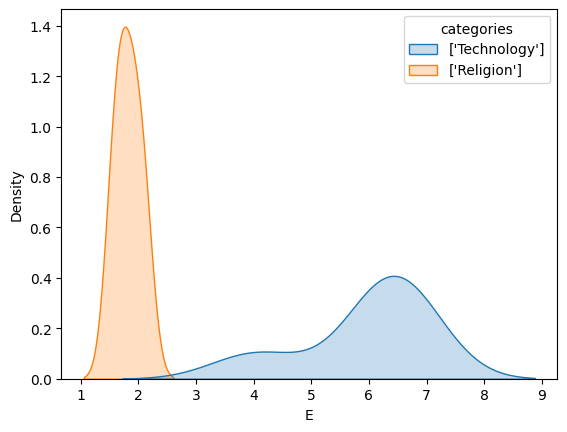

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=filtered_df, x='E', hue = 'categories', fill=True, common_norm=False)
plt.show()